In [1]:
!gdown 1zqToCWKa8GyigYc2HpGDo6OrM3DQu-tg&export=download

Downloading...
From: https://drive.google.com/uc?id=1zqToCWKa8GyigYc2HpGDo6OrM3DQu-tg
To: /content/tqdm-final.zip
100% 227M/227M [00:01<00:00, 147MB/s]


In [2]:
!unzip tqdm-final.zip

Archive:  tqdm-final.zip
  inflating: tqdm-final.csv          


In [3]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [4]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=4ebd7a1e18e374d56e7566a98bd625c0756f700bb5f98bb3c242ebd55e3c527f
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [5]:
!pip install nltk contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.9 MB/s eta 0:00:00


In [6]:
import pandas as pd

import glob
import os
import sys
import matplotlib.pyplot as plt
import wordcloud
import emoji
import re
import nltk
import wordcloud
import contractions
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1a1WYjn6ivTJBR95kubK4NnrSTR1u1OkB

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1a1WYjn6ivTJBR95kubK4NnrSTR1u1OkB
To: /content/twitter_sentiment_data.csv
100% 6.57M/6.57M [00:00<00:00, 72.4MB/s]


In [8]:
df = pd.read_csv('twitter_sentiment_data.csv')
df

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


In [9]:
print(df.shape[0])

43943


In [11]:
#Data-Cleaning
#Remove duplicates if any
df['text']=df['message'].apply(str)
lenBeforeDuplicatesDrop = df.shape[0]
# df.drop_duplicates(inplace=True, subset="TweetId")
# lenAfterDuplicatesDrop = df.shape[0]

In [12]:
#Remove dates
df["processed_text"] = df["text"].str.replace("\d{1,2}\s\w*\s\d{4}\s-\s","")

<ipython-input-12-ab5afe47e1f0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["processed_text"] = df["text"].str.replace("\d{1,2}\s\w*\s\d{4}\s-\s","")


In [13]:
#Remove special characters and convert case to lower
import re
# Remove punctuation
df['processed_text'] = df['processed_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Lowercase the words
df['processed_text'] = df['processed_text'].map(lambda x: x.lower())

In [14]:
#Remove URLS and username mentions & hashtags
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
    
df['processed_text'] = df['processed_text'].apply(strip_links)
df['processed_text'] = df['processed_text'].apply(strip_all_entities)

In [15]:
#Remove numerical data
df['processed_text'] = df['processed_text'].str.replace('\d+', '')

<ipython-input-15-84ce33c2ce64>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_text'] = df['processed_text'].str.replace('\d+', '')


In [16]:
df.shape[0]

43943

In [17]:
#Expand short-forms. i'll -> I will
df['processed_text'] = df['processed_text'].apply(contractions.fix)

In [18]:
my_stopwords = nltk.corpus.stopwords.words('english')

df['processed_text'] = df['processed_text'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))
df['processed_text'] = df['processed_text'].apply(lambda x: " ".join(x.split()))
df['processed_text'] = df['processed_text'].apply(lambda x: " ".join([t for t in x.split() if t not in my_stopwords]))

In [19]:
#Manually remove bad words!
remove_words = ["midnight", "utc", "feb", "february", "km", "amp", "atsu", "min", "ago", "nw", "ne", "time", "one", "U", "g", "u", "g", "am", "pm", "mile", "north", "south"]
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['processed_text'] = df['processed_text'].str.replace(pat, '')

<ipython-input-19-a3852f787a2e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_text'] = df['processed_text'].str.replace(pat, '')


In [20]:
#Lemmatize text
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lst = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    return ' '.join(lst)

df['LemmatizeText'] = df['processed_text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


(-0.5, 1599.5, 799.5, -0.5)

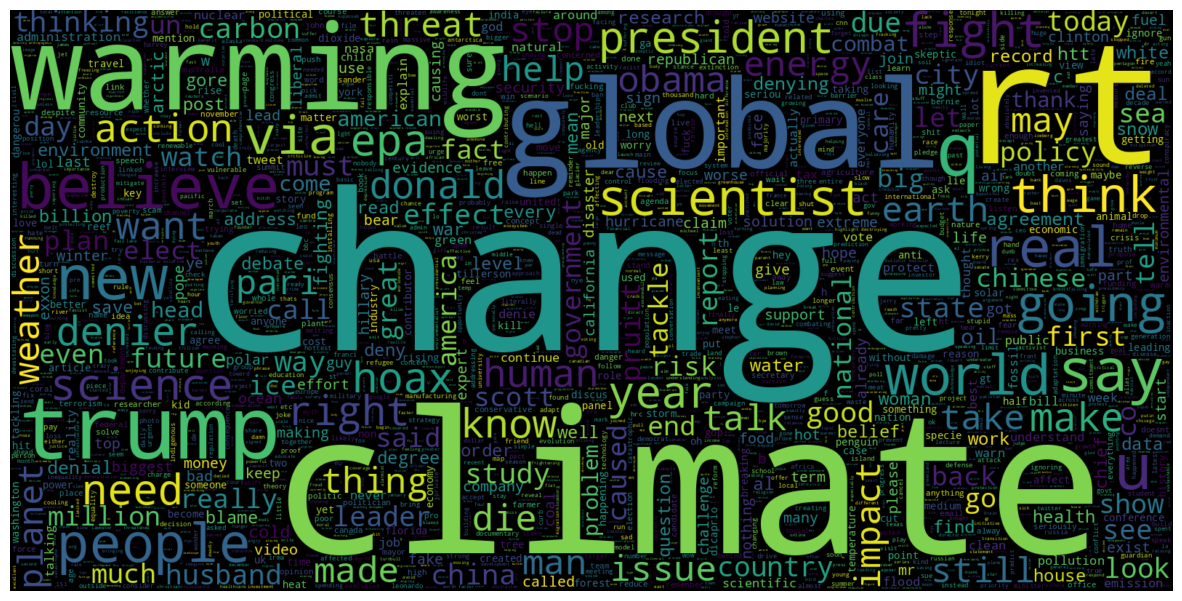

In [21]:
#Generate wordcloud (Visualize)
import wordcloud

word_string=" ".join(df['LemmatizeText'].str.lower())

plt.figure(figsize=(15,15))
wc = wordcloud.WordCloud(collocations=False, background_color="black", stopwords = wordcloud.STOPWORDS, max_words=2000, max_font_size=300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [22]:
df.head()

,sentiment,message,tweetid,text,processed_text,LemmatizeText
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840,@tiniebeany climate change is an interesting h...,climate change interesting hustle global warmi...,climate change interesting hustle global warmi...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,RT @NatGeoChannel: Watch #BeforeTheFlood right...,rt watch right travels world tackle climate ch...,rt watch right travel world tackle climate cha...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,Fabulous! Leonardo #DiCaprio's film on #climat...,fabulous leonardo film change brilliant watch via,fabulous leonardo film change brilliant watch via
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,RT @Mick_Fanning: Just watched this amazing do...,rt fanning watched amazing documentary leonard...,rt fanning watched amazing documentary leonard...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",rt pranita biswasi lutheran odisha gives testi...,rt pranita biswasi lutheran odisha give testim...


In [24]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of a text using VADER
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'text' column of the dataset
df['sentiment'] = df['LemmatizeText'].apply(get_sentiment)

# Save the labeled dataset
df.to_csv('labeled_dataset.csv', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
df.head()

,sentiment,message,tweetid,text,processed_text,LemmatizeText
0,positive,@tiniebeany climate change is an interesting h...,792927353886371840,@tiniebeany climate change is an interesting h...,climate change interesting hustle global warmi...,climate change interesting hustle global warmi...
1,neutral,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,RT @NatGeoChannel: Watch #BeforeTheFlood right...,rt watch right travels world tackle climate ch...,rt watch right travel world tackle climate cha...
2,positive,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,Fabulous! Leonardo #DiCaprio's film on #climat...,fabulous leonardo film change brilliant watch via,fabulous leonardo film change brilliant watch via
3,positive,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,RT @Mick_Fanning: Just watched this amazing do...,rt fanning watched amazing documentary leonard...,rt fanning watched amazing documentary leonard...
4,negative,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",rt pranita biswasi lutheran odisha gives testi...,rt pranita biswasi lutheran odisha give testim...


In [26]:
df['sentiment'].value_counts()

negative    16899
positive    16570
neutral     10474
Name: sentiment, dtype: int64

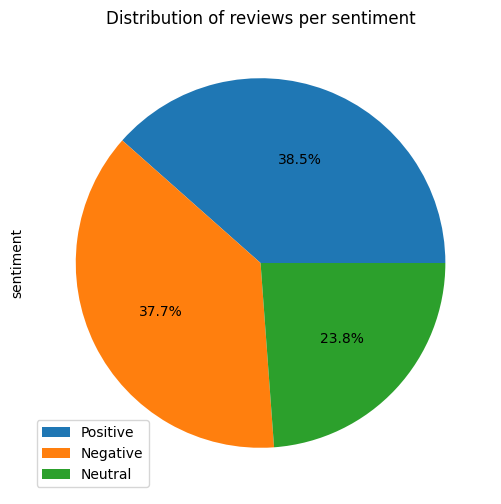

In [27]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['','',''],autopct='%1.1f%%')
labels=["Positive","Negative","Neutral"]
plt.legend(labels,loc=3)

In [30]:
import pandas as pd
label=[]
for senti in df['sentiment']:
  if(senti=='positive'):
    label.append(1)
  elif(senti=='negative'):
    label.append(-1)
  else:
    label.append(0)    
label
df['label']=label

In [31]:
df.head()

,sentiment,message,tweetid,text,processed_text,LemmatizeText,label
0,positive,@tiniebeany climate change is an interesting h...,792927353886371840,@tiniebeany climate change is an interesting h...,climate change interesting hustle global warmi...,climate change interesting hustle global warmi...,1
1,neutral,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,RT @NatGeoChannel: Watch #BeforeTheFlood right...,rt watch right travels world tackle climate ch...,rt watch right travel world tackle climate cha...,0
2,positive,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,Fabulous! Leonardo #DiCaprio's film on #climat...,fabulous leonardo film change brilliant watch via,fabulous leonardo film change brilliant watch via,1
3,positive,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,RT @Mick_Fanning: Just watched this amazing do...,rt fanning watched amazing documentary leonard...,rt fanning watched amazing documentary leonard...,1
4,negative,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",rt pranita biswasi lutheran odisha gives testi...,rt pranita biswasi lutheran odisha give testim...,-1


In [32]:
df.to_csv("NLP_dataset.csv")
!zip -r /content/NLP_dataset.zip /content/NLP_dataset.csv

  adding: content/NLP_dataset.csv (deflated 79%)
